Challenge Set 2<br >
Topic:        Pandas<br >
Date:         xx/xx/xxxx<br >
Name:         Seth Kaufman

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline

# Pandas Challenges

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: 10 minutes to pandas

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv



### Challenge 1

Plot domestic total gross over time.



In [7]:
mojo = pd.read_csv('../../../challenges_data/2013_movies.csv',parse_dates=[6],
                   dtype={'Budget':float,'DomesticTotalGross':int,'Runtime':int})
mojo.sort_values('ReleaseDate',inplace=True)
mojo.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25


In [8]:
gross_bydate = mojo.groupby('ReleaseDate',as_index=False)['DomesticTotalGross'].mean().sort_values('ReleaseDate')

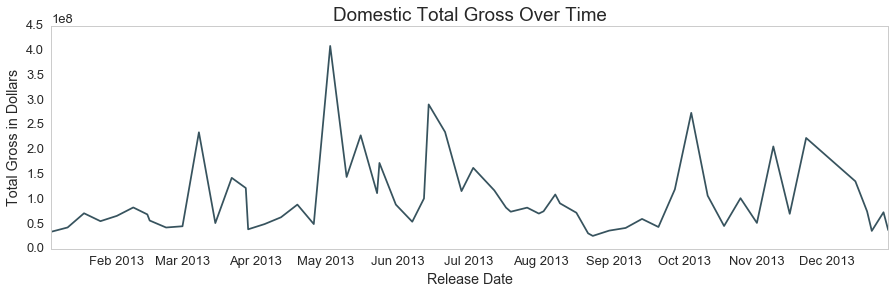

In [17]:
fig = sns.plt.figure(figsize=[15,4])
y = np.polyfit(gross_bydate.ReleaseDate.apply(lambda x : datetime.datetime.timestamp(x)),gross_bydate.DomesticTotalGross,3)
sns.set(style="whitegrid", palette="GnBu_d",font_scale=1.3)
plt.title('Domestic Total Gross Over Time',fontsize='large')
plt.ylabel('Total Gross in Dollars')
plt.grid(b='off')
plt.xlabel('Release Date')

sns.plt.plot_date(x=gross_bydate.ReleaseDate,y=gross_bydate.DomesticTotalGross, fmt ='',linestyle='-')
plt.show()


Challenge 2

Plot runtime vs. domestic total gross.

In [67]:
runtime_bydate = mojo.groupby('Runtime',as_index=False)['DomesticTotalGross'].mean().sort_values('Runtime')

In [87]:
runtime_bydate

,Runtime,DomesticTotalGross
0,75,32244051
1,80,40041683
2,85,48244451
3,87,36076121
4,88,55703475
5,89,57012977
6,90,59832323
7,91,164166280
8,92,47192662
9,93,63842699


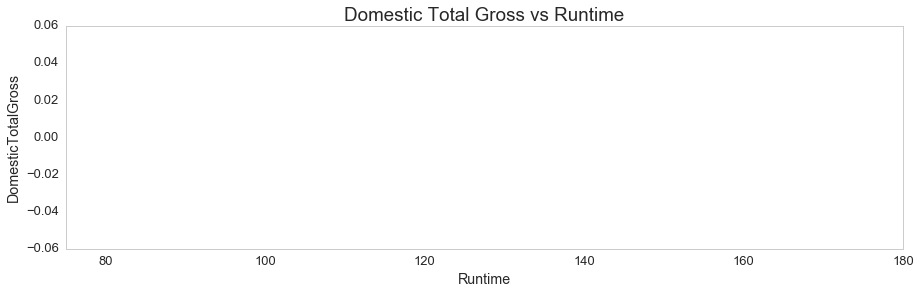

In [86]:
fig = sns.plt.figure(figsize=[15,4])
sns.set(style="whitegrid", palette="GnBu_d",font_scale=1.3)
plt.title('Domestic Total Gross vs Runtime',fontsize='large')
plt.ylabel('Total Gross in Dollars')
plt.grid(b='off')
plt.xlabel('Runtime')
sns.tsplot(data=runtime_bydate, value='DomesticTotalGross',time='Runtime',n_boot=500)
plt.show()

Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [72]:
group_byrating = mojo.groupby('Rating')[['Runtime','DomesticTotalGross']].mean()
group_byrating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


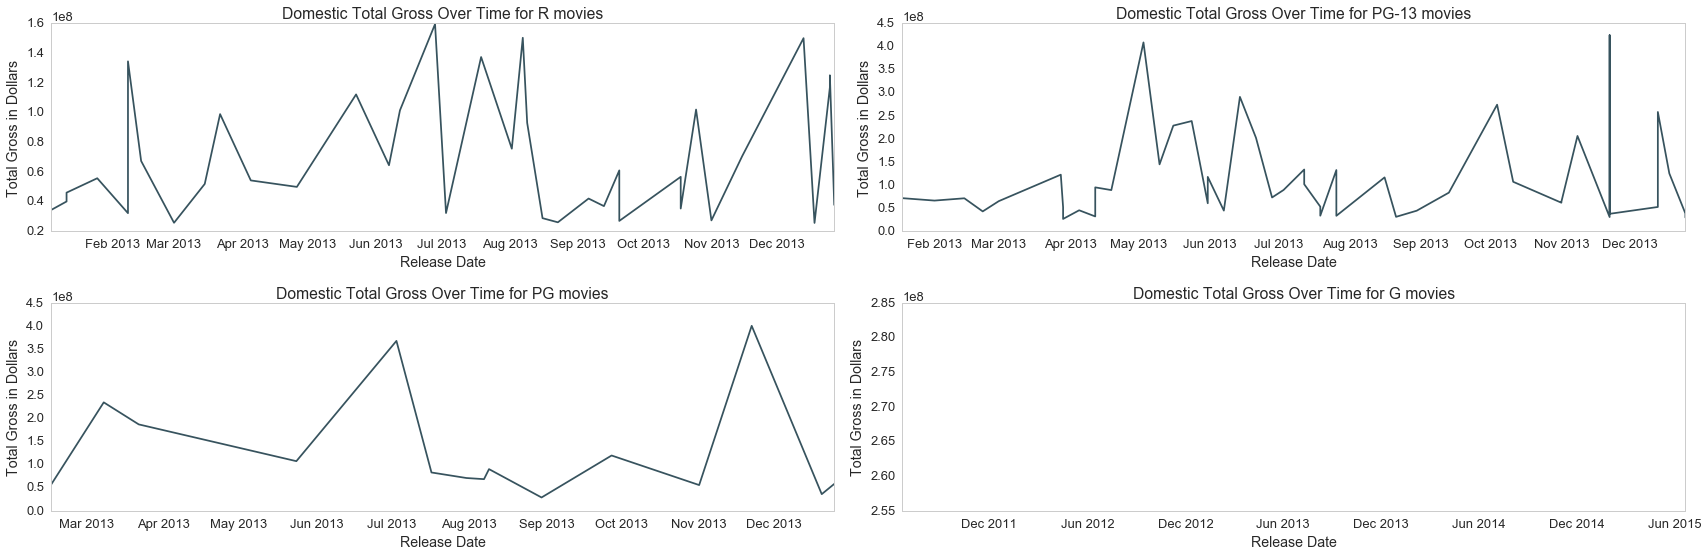

In [74]:
rating_fig=sns.plt.figure(figsize=[24,8])
sns.set(style="whitegrid", palette="GnBu_d",font_scale=1.3)
ratings = mojo['Rating'].unique()
rating_fig.set_tight_layout(True)
for i,r in enumerate(ratings,1):
    ax = rating_fig.add_subplot(2,2,i)
    sns.plt.plot_date(x=mojo[mojo['Rating']==r].ReleaseDate,y=mojo[mojo['Rating']==r].DomesticTotalGross, 
                          fmt ='',linestyle='-')
    ax.set_title('Domestic Total Gross Over Time for %s movies'%r)
    ax.set_ylabel('Total Gross in Dollars')
    ax.grid(b='off')
    ax.set_xlabel('Release Date')

Challenge 5

What director in your dataset has the highest gross per movie?




In [75]:
mojo.groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending=False)

Director
Francis Lawrence              424668047
Shane Black                   409013994
Chris BuckJennifer Lee        400738009
Pierre CoffinChris Renaud     368061265
Zack Snyder                   291045518
Alfonso Cuaron                274092705
Dan Scanlon                   268492764
Peter Jackson                 258366855
Justin Lin                    238679850
Sam Raimi                     234911825
J.J. Abrams                   228778661
Alan Taylor                   206362140
Marc Forster                  202359711
Kirk De MiccoChris Sanders    187168425
Paul Feig                     159582188
Rawson Marshall Thurber       150394119
David O. Russell              150117807
Baz Luhrmann                  144840419
Seth Gordon                   134506920
Dennis Dugan                  133668525
James Mangold                 132556852
Adam McKay                    125168368
Peter Berg                    125095601
Jon Chu                       122523060
Louis Leterrier               1

uykjh=-P{OL5678890-\
/09ˆ÷0i=-09/87yit6ryedytfyu89i0-90oghp-=i;=]\/p890-oiuytenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [130]:
rd_indexed = mojo.set_index('ReleaseDate')['DomesticTotalGross']
rd_grouped = rd_indexed.groupby(pd.TimeGrouper(freq='1M')).mean()
rd_grouped

ReleaseDate
2013-01-31     49543237
2013-02-28     67386013
2013-03-31     96097096
2013-04-30     60940719
2013-05-31    177409720
2013-06-30    150650005
2013-07-31    105780721
2013-08-31     68531263
2013-09-30     61712314
2013-10-31    115027038
2013-11-30    137936759
2013-12-31     87483385
Freq: M, Name: DomesticTotalGross, dtype: int64